In [1]:
# Import section 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species (target) column and check output
df['species'] = iris.target
df.head() 


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Motivation

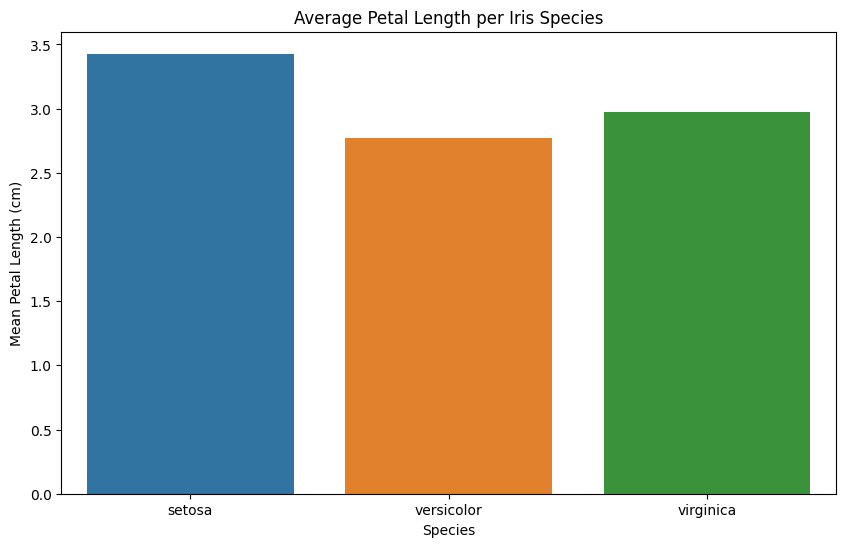

In [2]:
# Motivation Example: Exploring Petal Length Variations
df_long = df.groupby('species').mean().reset_index() 
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
# Map the numbers to species names
df_long['species'] = df_long['species'].map(species_mapping)
custom_palette = {'setosa': 'tab:blue', 'versicolor': 'tab:orange', 'virginica': 'tab:green'}  

plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='sepal width (cm)', hue='species', palette=custom_palette, data=df_long, legend=False)
plt.title("Average Petal Length per Iris Species") 
plt.ylabel("Mean Petal Length (cm)") 
plt.xlabel("Species")
plt.show()

* From this bar chart, can we see the spread of Petal Length
* within any  single species? **-> This encourages a desire for more detail**

# Distribution Visualizations

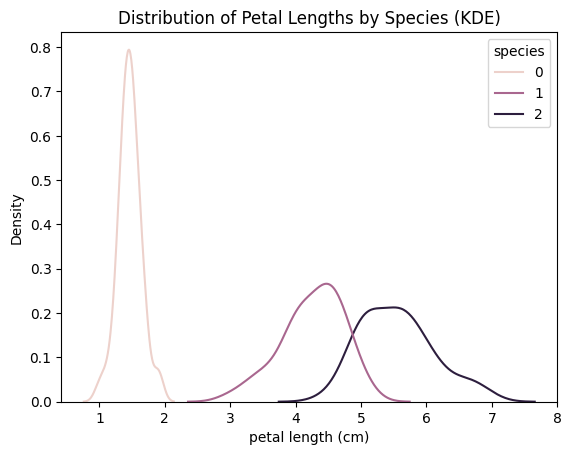

In [3]:
# Kernel Density Plots (KDEs)
sns.kdeplot(data=df, x='petal length (cm)', hue='species')
plt.title("Distribution of Petal Lengths by Species (KDE)")
plt.show()

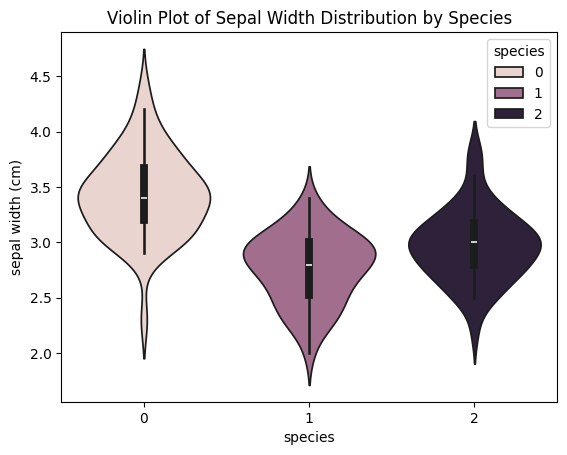

In [7]:
# Violin Plots
sns.violinplot(data=df, x='species', y='sepal width (cm)', hue='species')
plt.title("Violin Plot of Sepal Width Distribution by Species")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


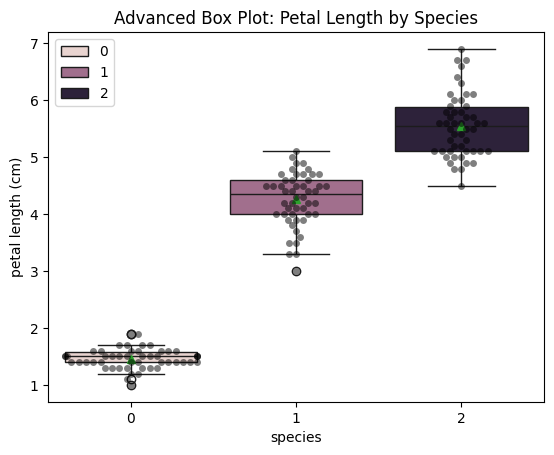

In [8]:
# Advanced Boxplots 
sns.boxplot(data=df, x='species', y='petal length (cm)', showmeans=True, hue='species')
sns.swarmplot(data=df, x='species', y='petal length (cm)', color='black', alpha=0.5)  # Overlay datapoints
plt.title("Advanced Box Plot: Petal Length by Species")
plt.show()

# Visualizing Multidimensionality

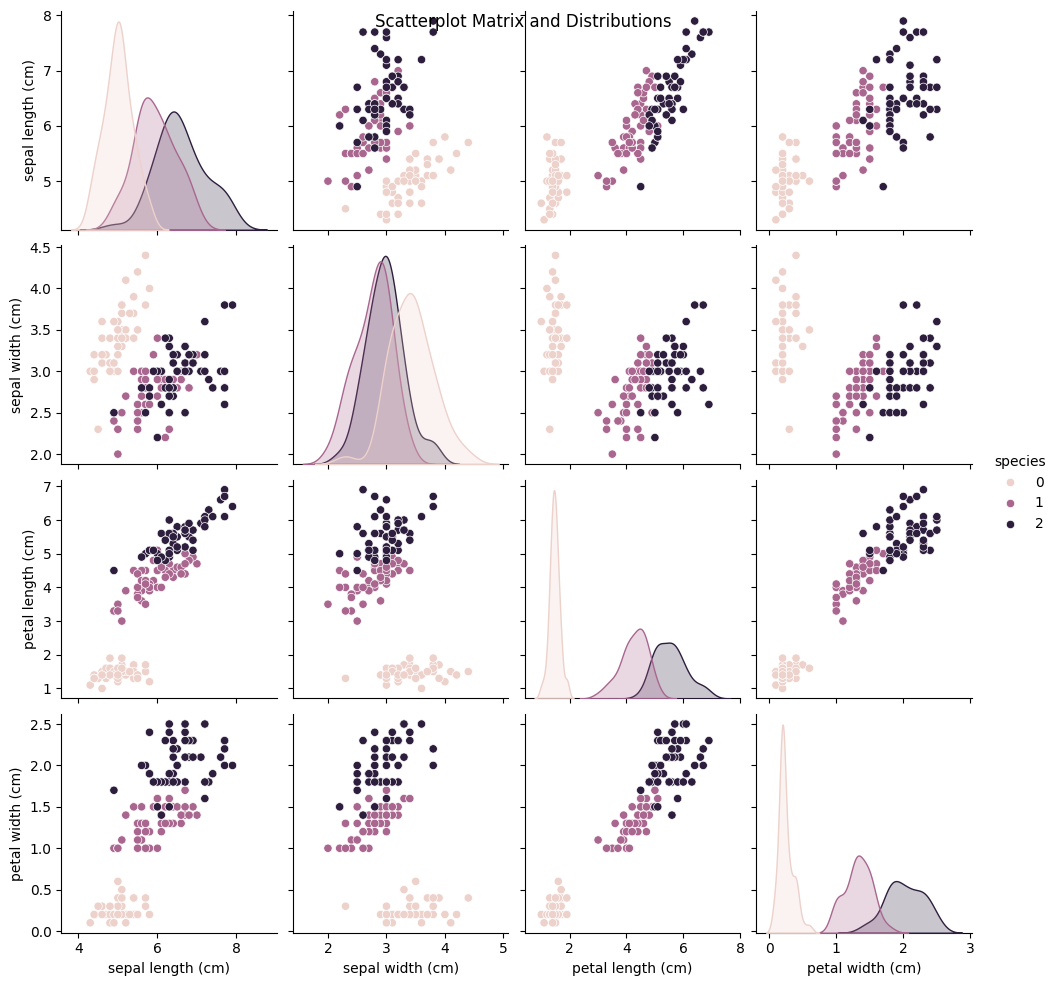

In [9]:
# Scatter Plot Matrix
sns.pairplot(df, hue='species', diag_kind='kde') 
plt.suptitle("Scatterplot Matrix and Distributions") 
plt.show()

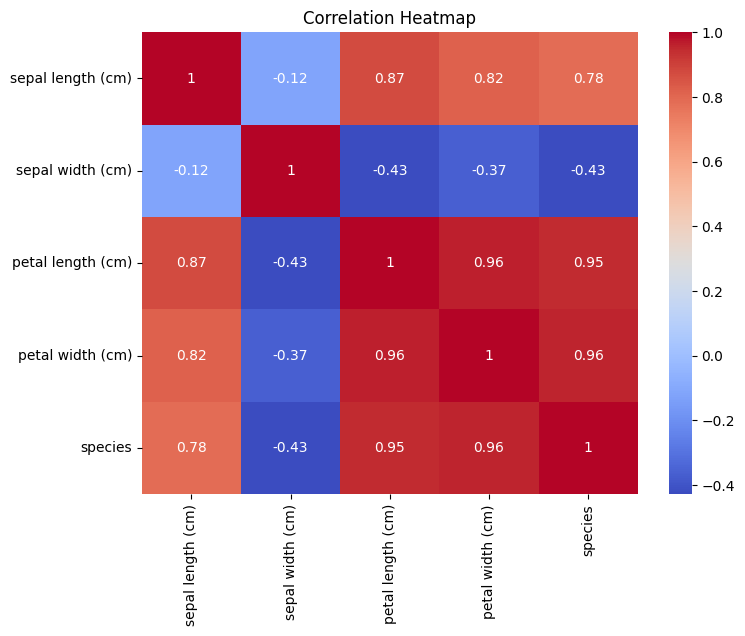

In [10]:
# Heatmap  
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Correlation matrix as a heatmap
plt.title('Correlation Heatmap')
plt.show()

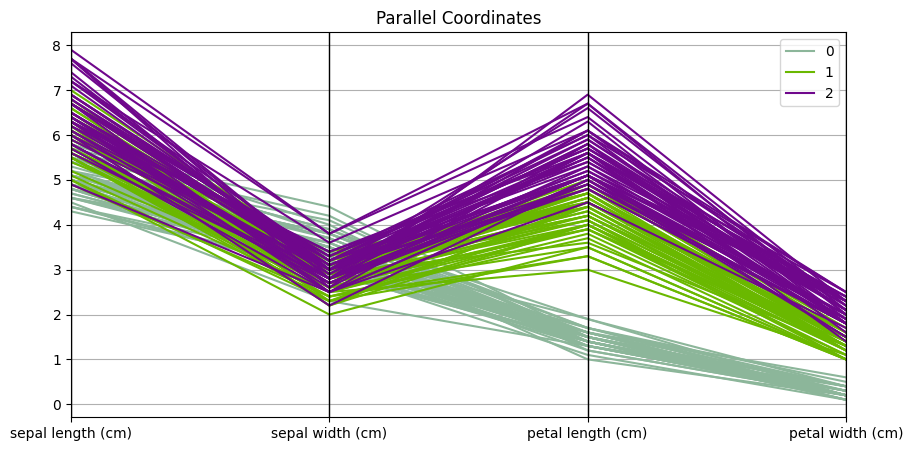

In [11]:
# Parallel Coordinates (may need !pip install pandas-parallel-coordinates)
from pandas.plotting import parallel_coordinates 
plt.figure(figsize=(10,5))
parallel_coordinates(df, 'species')
plt.title('Parallel Coordinates')
plt.show()


# Interactive Plots

In [12]:
# !pip3 install plotly

In [13]:
import plotly.express as px

fig = px.scatter(df, x="sepal length (cm)", y="sepal width (cm)", color="species", title="Interactive Exploration")

# fig.show(renderer="notebook")
fig.show(renderer="browser")

# Principles of  Effective Visualization

Text(0.5, 0, '')

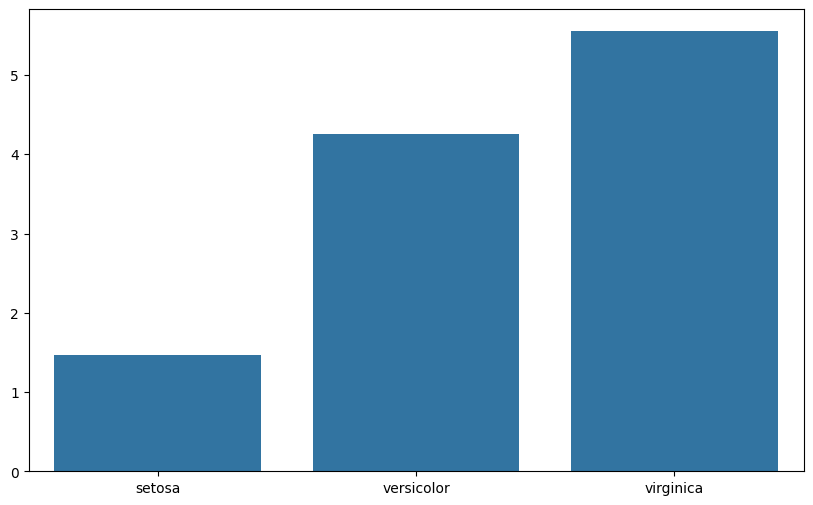

In [14]:
# Grouping and Calculating the mean based on species
df_long = df.groupby('species').mean().reset_index() 
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df_long['species'] = df_long['species'].map(species_mapping)
plt.figure(figsize=(10, 6))
sns.barplot(x='species', y='petal length (cm)', data=df_long, legend=False)
plt.ylabel("")
plt.xlabel("")


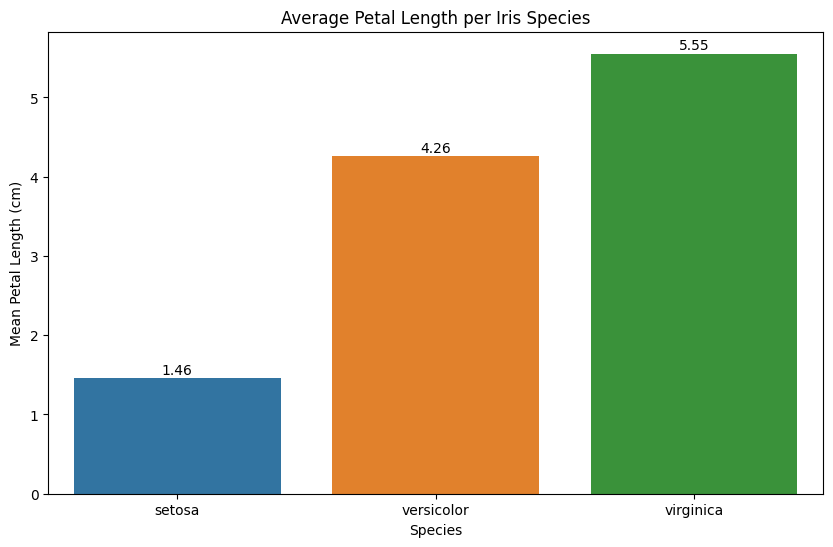

In [15]:
# Grouping and Calculating the mean based on species
df_long = df.groupby('species').mean().reset_index() 

species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Map the numbers to species names
df_long['species'] = df_long['species'].map(species_mapping)

# Define a visually distinct color palette 
custom_palette = {'setosa': 'tab:blue', 'versicolor': 'tab:orange', 'virginica': 'tab:green'}  

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='species', y='petal length (cm)', hue='species', palette=custom_palette, data=df_long, legend=False)

# Emphasize core message with chart title
plt.title("Average Petal Length per Iris Species")  

# Clear labeling provides clarity
plt.ylabel("Mean Petal Length (cm)") 
plt.xlabel("Species")

# Add data values directly on top of bars
for p in ax.patches:
    height = p.get_height()
    # Format numbers to two decimal places
    value_label = '{:.2f}'.format(height)
    # Place the text on the bar
    ax.text(p.get_x() + p.get_width() / 2., height + 0.05, value_label, ha="center")

plt.show() 
